<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/SARIMAX_NEW_version_bridging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.datadriveninvestor.com/time-series-prediction-using-sarimax-a6604f258c56

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [ ]:
dataset= pd.read_excel('/content/electricty_real&Funda&al_data_selected.xlsx')

In [ ]:
dataset.head(2)

,Date,price day ahead real,Estimated price,Demand DE,Wind,PV,Gas,Coal,CO2
0,2014-12-31 23:59:59.991,18.29,25.390297,40242.25,8280.00,0.0,21.3,55.17,7.27
1,2015-01-01 00:59:59.991,16.04,24.980000,39158.50,8412.75,0.0,21.3,55.17,7.27


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  52608 non-null  datetime64[ns]
 1   price day ahead real  52608 non-null  float64       
 2   Estimated price       52608 non-null  float64       
 3   Demand DE             52608 non-null  float64       
 4   Wind                  52608 non-null  float64       
 5   PV                    52608 non-null  float64       
 6   Gas                   52608 non-null  float64       
 7   Coal                  52608 non-null  float64       
 8   CO2                   52608 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
dataset['Date'] =pd.to_datetime(dataset['Date'])
dataset.index= dataset['Date']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset[['Estimated price ','Demand DE','Wind','PV','Gas','Coal', 'CO2']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [ ]:
X

,0,1,2,3,4,5,6
0,0.270783,0.227131,0.169799,0.0,0.691411,0.383823,0.113760
1,0.268335,0.204832,0.172628,0.0,0.691411,0.383823,0.113760
2,0.267243,0.197959,0.174536,0.0,0.691411,0.383823,0.113760
3,0.274864,0.200938,0.178079,0.0,0.691411,0.383823,0.113760
4,0.240881,0.203479,0.181932,0.0,0.691411,0.383823,0.113760
...,...,...,...,...,...,...,...
52603,0.456646,0.417945,0.164971,0.0,0.606685,0.408538,0.976158
52604,0.422256,0.381557,0.152247,0.0,0.606685,0.408538,0.976158
52605,0.422256,0.381850,0.140439,0.0,0.606685,0.408538,0.976158
52606,0.422256,0.350179,0.129622,0.0,0.606685,0.408538,0.976158


In [ ]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset[['price day ahead real']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [ ]:
X.rename(columns={0:'Estimated price ',1: 'Demand DE',2:'Wind',3:'PV',4:'Gas',5:'Coal', 6:'CO2'}, inplace= True)
X.index=dataset.index
X.head(2)

,Estimated price,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,
2014-12-31 23:59:59.991,0.270783,0.227131,0.169799,0.0,0.691411,0.383823,0.11376
2015-01-01 00:59:59.991,0.268335,0.204832,0.172628,0.0,0.691411,0.383823,0.11376


In [ ]:
y.rename(columns={0:'price day ahead real'}, inplace= True)
y.index=dataset.index
y.head(2)

,price day ahead real
Date,
2014-12-31 23:59:59.991,0.449459
2015-01-01 00:59:59.991,0.442644


In [ ]:
y

,price day ahead real
Date,
2014-12-31 23:59:59.991,0.449459
2015-01-01 00:59:59.991,0.442644
2015-01-01 01:59:59.991,0.438282
2015-01-01 02:59:59.991,0.439342
2015-01-01 03:59:59.991,0.437979
...,...
2020-12-31 18:59:59.980,0.565807
2020-12-31 19:59:59.980,0.552903
2020-12-31 20:59:59.980,0.551147


In [ ]:
train_size=34968 
test_size = 17640
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [ ]:
test_X

,Estimated price,Demand DE,Wind,PV,Gas,Coal,CO2
Date,,,,,,,
2018-12-27 23:59:59.983,0.403708,0.345376,0.208697,0.0,0.750097,0.792174,0.707425
2018-12-28 00:59:59.983,0.403708,0.328164,0.207994,0.0,0.750097,0.792174,0.707425
2018-12-28 01:59:59.983,0.403708,0.332313,0.207424,0.0,0.750097,0.792174,0.707425
2018-12-28 02:59:59.983,0.403708,0.359784,0.204541,0.0,0.750097,0.792174,0.707425
2018-12-28 03:59:59.983,0.403708,0.413988,0.197694,0.0,0.750097,0.792174,0.707425
...,...,...,...,...,...,...,...
2020-12-31 18:59:59.980,0.456646,0.417945,0.164971,0.0,0.606685,0.408538,0.976158
2020-12-31 19:59:59.980,0.422256,0.381557,0.152247,0.0,0.606685,0.408538,0.976158
2020-12-31 20:59:59.980,0.422256,0.381850,0.140439,0.0,0.606685,0.408538,0.976158


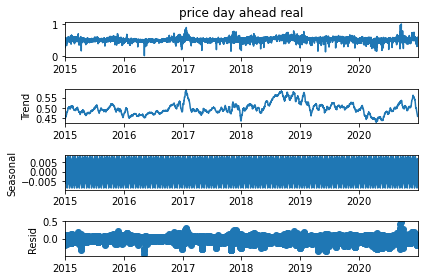

In [ ]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(y['price day ahead real'], model='add', extrapolate_trend='freq', period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [ ]:
y_train=y['price day ahead real'][:train_size].dropna()
test_adf(y_train)

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary 


In [ ]:
y_test=y['price day ahead real'][:train_size].dropna()
test_adf(y_test)

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary 


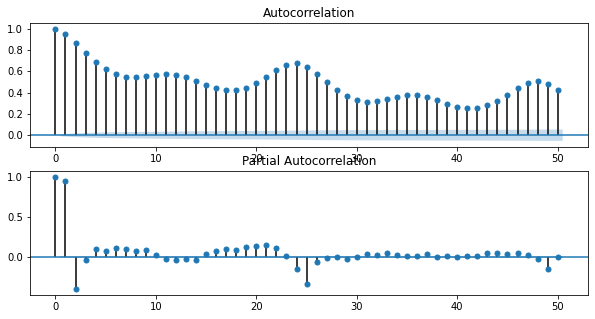

In [ ]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-198115.747, Time=13.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-192905.505, Time=5.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-198110.167, Time=5.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-197372.665, Time=6.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-192907.504, Time=0.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-198106.919, Time=25.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-198194.451, Time=32.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-198417.066, Time=19.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-198418.314, Time=20.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-198414.769, Time=42.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-198522.444, Time=35.60 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=45.91 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-199681.766, Time=50.04 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-201140.491, Time

In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                34968
Model:               SARIMAX(7, 1, 6)   Log Likelihood              101440.951
Date:                Thu, 08 Sep 2022   AIC                        -202851.902
Time:                        18:16:16   BIC                        -202724.969
Sample:                             0   HQIC                       -202811.469
                              - 34968                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.687e-06   1.66e-05     -0.222      0.825   -3.63e-05    2.89e-05
ar.L1          1.1188      0.659      1.699      0.089      -0.172       2.410
ar.L2         -0.2586      1.007     -0.257      0.797      -2.233       1.716
ar.L3          0.4293      0.578      0.743      0.457      -0.703       1.561
ar.L4         -1.1483      0.518     -2.218      0.027      -2.163      -0.134
ar.L5          0.4196      0.968      0.434      0.665      -1.477       2.316
ar.L6          0.1697      0.669      0.254      0.800      -1.141       1.481
ar.L7         -0.1043      0.160     -0.653      0.514      -0.417       0.209
ma.L1         -0.8934      0.659     -1.357      0.175      -2.184       0.397
ma.L2         -0.0250      0.860     -0.029      0.977      -1.710       1.660
ma.L3         -0.4491      0.330     -1.362      0.173      -1.095       0.197
ma.L4          1.0595      0.427      2.479      0.013       0.222       1.897
ma.L5         -0.1810      0.872     -0.208      0.836      -1.890       1.528
ma.L6         -0.2886      0.473     -0.610      0.542      -1.215       0.638
sigma2         0.0002   4.12e-07    429.115      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  32.27   Jarque-Bera (JB):           1450994.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=(7,1,6),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn(


In [ ]:
results= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  maxiter=maxiter,


In [ ]:
print(results.summary().tables[1])

                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Estimated price      0.0889      0.001     78.203      0.000       0.087       0.091
Demand DE            0.1593      0.001    154.255      0.000       0.157       0.161
Wind                -0.1463      0.002    -78.281      0.000      -0.150      -0.143
PV                  -0.0940      0.001    -79.822      0.000      -0.096      -0.092
Gas                 -0.0109      0.019     -0.575      0.565      -0.048       0.026
Coal                -0.0179      0.014     -1.295      0.195      -0.045       0.009
CO2                  0.0335      0.027      1.230      0.219      -0.020       0.087
ar.L1               -0.2563      0.541     -0.473      0.636      -1.317       0.805
ar.L2               -0.2232      0.180     -1.242      0.214      -0.575       0.129
ar.L3                0.0324      0.239      0.136      0.892     

In [ ]:
predictions= results.predict(start =train_size, end=train_size+test_size-1,exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


In [ ]:
forecast_1= results.forecast(steps=test_size, exog=test_X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  if isinstance(end, slice):


In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['price day ahead real'] = act['price day ahead real']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
predictions

,predicted_mean,price day ahead real
Date,,
2018-12-27 23:59:59.983,0.540927,0.545512
2018-12-28 00:59:59.983,0.536441,0.543059
2018-12-28 01:59:59.983,0.537179,0.540999
2018-12-28 02:59:59.983,0.542453,0.539666
2018-12-28 03:59:59.983,0.553026,0.544967
...,...,...
2020-12-31 18:59:59.980,0.580635,0.565807
2020-12-31 19:59:59.980,0.573645,0.552903
2020-12-31 20:59:59.980,0.575419,0.551147


In [ ]:
act['price day ahead real']

Date
2018-12-27 23:59:59.983    0.545512
2018-12-28 00:59:59.983    0.543059
2018-12-28 01:59:59.983    0.540999
2018-12-28 02:59:59.983    0.539666
2018-12-28 03:59:59.983    0.544967
                             ...   
2020-12-31 18:59:59.980    0.565807
2020-12-31 19:59:59.980    0.552903
2020-12-31 20:59:59.980    0.551147
2020-12-31 21:59:59.980    0.552358
2020-12-31 22:59:59.980    0.548148
Name: price day ahead real, Length: 17640, dtype: float64

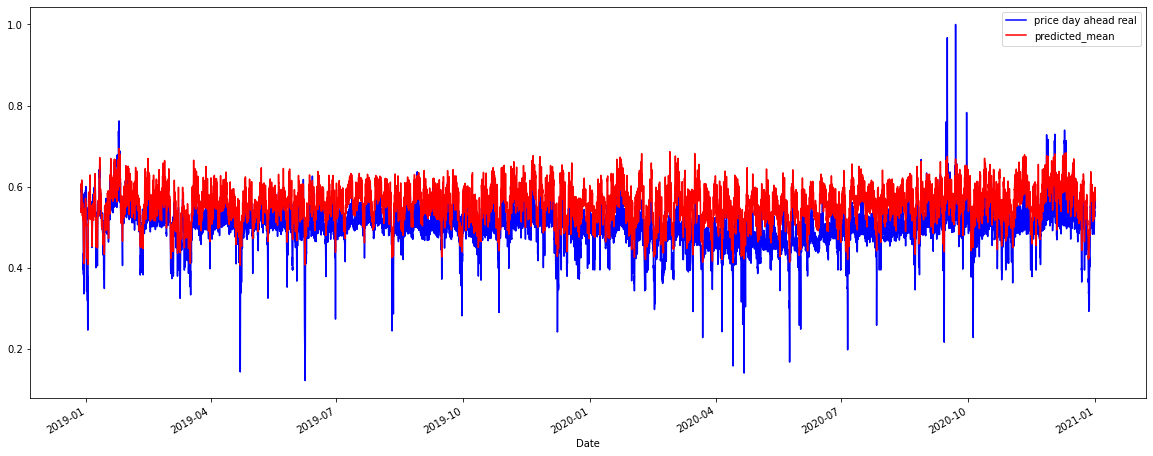

In [ ]:
predictions['price day ahead real'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
#forecast_Price= pd.DataFrame(forecast_1)
#forecast_Price.reset_index(drop=True, inplace=True)
#forecast_Price.index=test_X.index
#forecast_Price['price day ahead real'] =scaler_output.iloc[train_size:, 0]
#forecast_Price.rename(columns={0:'Forecast'}, inplace=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['predicted_mean'], predictions['price day ahead real'])
error

0.06267523936060213

In [ ]:
trainPredict = sc_out.inverse_transform(predictions[['predicted_mean']])
testPredict = sc_out.inverse_transform(predictions[['price day ahead real']])

In [ ]:
Prediction=pd.DataFrame(trainPredict)
Actual=pd.DataFrame(testPredict)

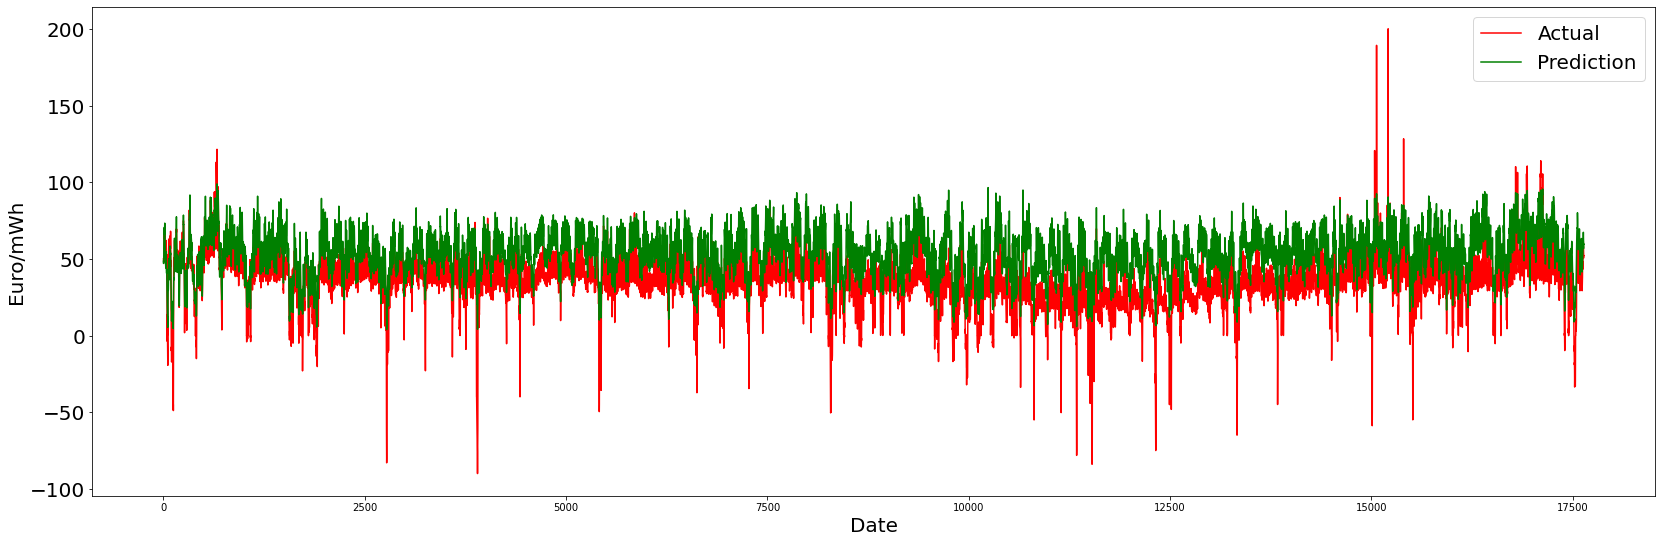

In [ ]:

#Plot Prediction and Actual series

fig, ax = plt.subplots(figsize = (28,9))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Euro/mWh', fontsize=20)
ax.plot(Actual, label = 'Actual', color = 'r')
ax.plot(Prediction, label = 'Prediction', color = 'g')
ax.tick_params(axis='y', labelsize = 20)
ax.legend(prop={'size': 20})


In [ ]:
import pandas as pd
from pandas import read_csv
import csv
#save data



Actual.to_csv("Actual.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')

Prediction.to_csv("SARIMAX_Prediction.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')